# Sentiment Analysis - Ravi's submission

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## NLTK (Natural Language Toolkit)

We utilize NLTK for our sentiment analysis needs. VADER, a component of NLTK, is traditionally employed for sentiment analysis on social media texts like Twitter and Reddit. Its rule-based approach allows it to effectively capture the nuances of informal communication, including emoticons, slang, and the context of short, fragmented sentences commonly found in such platforms.


Download VADER

In [35]:
# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ravicharan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Our classification

Vader gives out sentiment scores in the range [1, 1]. Here is the breakdown of our sentiment score classifications

* [-1, -0.05) - Negative
* [-0.05, 0.05] - Neutral
* (0.05, 1] - Positive

In [36]:
def analyze_sentiment(sentence):
    # Initialize VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # Get sentiment scores
    scores = sid.polarity_scores(sentence)
    
    # Determine sentiment category
    if scores['compound'] > 0.05:
        return 1
    elif scores['compound'] < -0.05:
        return -1
    else:
        return 0

### Get the sentiments from the file name 

In [31]:
def get_sentiments(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    sentiments = [analyze_sentiment(line) for line in lines]
    return sentiments

### Plot the Sentiments 

We generate the following plots: 

* Histogram to plot the frequency of each class of  sentiment
* Pie Chart to plot the frequency of each class of sentiment
* Pie Chart to plot the percentages of each class of sentiment 

In [32]:
# Generates 2 plots for visualizing the sentiments
def plot_sentiments(sentiments):
    sentiment_counts = {1: 0, 0: 0, -1: 0}
    for sentiment in sentiments:
        sentiment_counts[sentiment] += 1
    
    labels = ['Negative', 'Neutral', 'Positive']
    sizes = [sentiment_counts[-1], sentiment_counts[0], sentiment_counts[1]]
    percentages = [size / sum(sizes) * 100 for size in sizes]
    
    # Plotting the subplots for counts, percentages, and sizes
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    # Plot for counts
    axs[0].bar(labels, sizes)
    axs[0].set_title('Sentiment Counts')
    
    # Plot for percentages
    axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[1].set_title('Sentiment Percentages')
    axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    # Plot for sizes
    axs[2].pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100),
                startangle=90)
    axs[2].set_title('Sentiment Sizes')
    axs[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.tight_layout()
    plt.show()

## Results

1. We just plug in the name of the text file from the "scraped_comments" folder that we want to analyse
2. Run this block to visualize the results

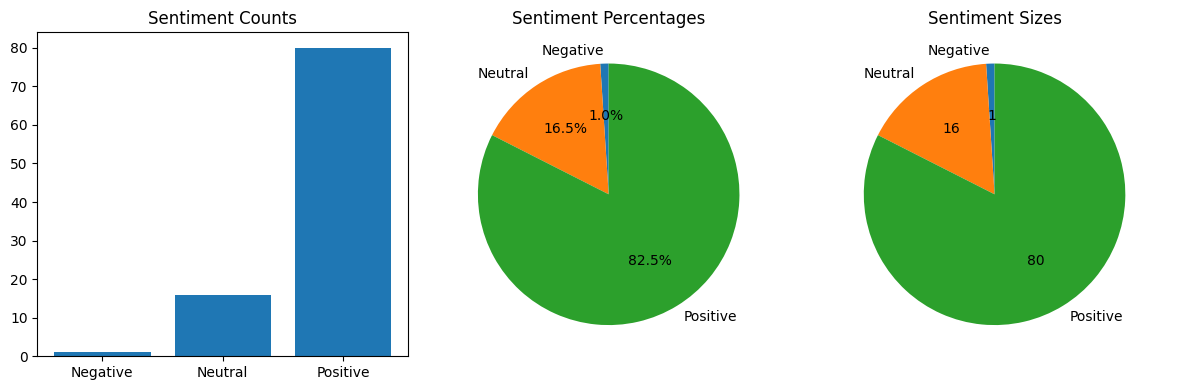

In [40]:
sentiments = get_sentiments('scraped_comments/Ellie1.txt')
plot_sentiments(sentiments)